In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/My Drive/Course Fall 24/Intro to ML/Assignment 1/D3.csv'
df = pd.read_csv(url)
print(df.head())

Mounted at /content/drive
         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [4]:
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
y = df.values[:, 3]
p = len(y)
q = len(X1)
r = len(X2)
s = len(X3)

print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('y = ', y[: 5])
print('p = ', p)
print('q = ', q)
print('r = ', r)
print('s = ', s)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
p =  100
q =  100
r =  100
s =  100


In [5]:
X_0 = np.ones((q, 1))
X_1 = X1.reshape(q, 1)
X_2 = X2.reshape(r, 1)
X_3 = X3.reshape(s, 1)
XX = np.hstack((X_0, X_1, X_2, X_3))
w = np.zeros(4)
XX

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939],
       [1.        , 0.2020202 , 2.91474747, 2.68242424],
       [1.        , 0.24242424, 3.60969697, 3.13090909],
       [1.        , 0.28282828, 0.30464646, 3.57939394],
       [1.        , 0.32323232, 0.99959596, 0.02787879],
       [1.        , 0.36363636, 1.69454546, 0.47636364],
       [1.        , 0.4040404 , 2.38949495, 0.92484849],
       [1.        , 0.44444444, 3.08444444, 1.37333333],
       [1.        , 0.48484848, 3.77939394, 1.82181818],
       [1.        , 0.52525252, 0.47434343, 2.27030303],
       [1.        , 0.56565657, 1.16929293, 2.71878788],
       [1.        , 0.60606061, 1.86424242, 3.16727273],
       [1.        , 0.64646465, 2.55919192, 3.61575758],
       [1.        , 0.68686869,

In [6]:
def loss_func(X, y, w, n):

    loss = X.dot(w)
    diff = np.subtract(loss, y)
    sqrDiff = np.square(diff)
    L = 1 / (2 * n) * np.sum(sqrDiff)
    return L

In [7]:
loss = loss_func(XX, y, w, q)
print('The cost  =', loss)

The cost  = 5.524438459196242


In [8]:
def gradient_descent(X, y, w, alpha, iter):

    p = len(y)  # Number of training examples
    loss_history = np.zeros(iter)

    for i in range(iter):
        loss = X.dot(w)
        diff = np.subtract(loss, y)
        sum_delta = (alpha / p) * X.transpose().dot(diff)
        w -= sum_delta
        loss_history[i] = loss_func(X, y, w, p)

    return w, loss_history

Final value of w = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
loss_history = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


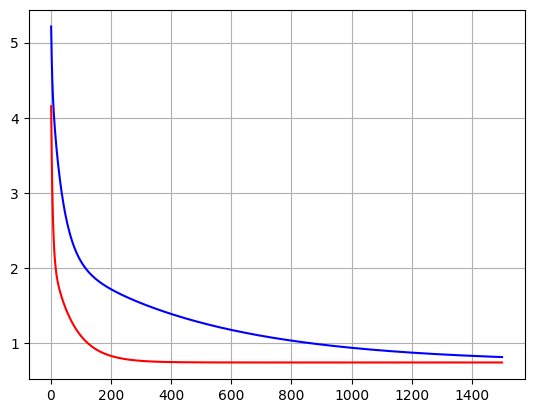

In [10]:
w0 = [0., 0., 0., 0.]
iterations = 1500
alpha_1 = 0.01
alpha_2 = 0.07
w, loss_history = gradient_descent(XX, y, w0, alpha_1, iterations)
w1, loss_history1 = gradient_descent(XX, y, w0, alpha_2, iterations)
print('Final value of w =', w)
print('loss_history =', loss_history)
plt.plot(range(1, iterations + 1), loss_history, color='blue')
plt.plot(range(1, iterations + 1), loss_history1, color='red')
plt.grid(True)

In [16]:
X_new=np.array([1, 1, 1, 1])
y=X_new.dot(w)
y

2.9413640816645295

In [17]:
X_new=np.array([2, 0, 4, 1])
y=X_new.dot(w)
y

11.10619614470471

In [18]:
X_new=np.array([3, 2, 1, 1])
y=X_new.dot(w)
y

9.404309549010408